# [Data mining #1](https://www.codewars.com/kata/58f89357d13bab79dc000208)

Your task is to build a $model^{1}$ which can predict y-coordinate.
You can pass tests if predicted y-coordinates are inside error margin.


You will receive train set which should be used to build a model.
After you build a model tests will call function `predict` and pass x to it.


Error is going to be calculated with [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/).




Blocked libraries: *sklearn, pandas, tensorflow, numpy, scipy*

#### Explanation
[1] *A mining model is created by applying an algorithm to data, but it is more than an algorithm or a metadata container: it is a set of data, statistics, and patterns that can be applied to new data to generate predictions and make inferences about relationships.*

In [145]:
def rmse(predicted_y, test_y):
    return (sum([(predicted_y[i]-test_y[i])**2 for i in range(len(test_y))])/len(test_y))**0.5

class Datamining:

    def __init__(self, train_set, lr = 0.01):
        self.train_set = train_set
        
        X = [point[0] for point in self.train_set]
        y = [point[1] for point in self.train_set]
        
        s_X = sorted(X)
        a = sum(s_X[i]-s_X[i-1] for i in range(1, len(X)))/len(X)
        b = sum(y)/len(y) - a * sum(X)/len(X)
        
        # let's find 'a', 'b'
        er = rmse([i*a+b for i in X], y)
        if rmse([i*(a+lr)+b for i in X], y) <= er:
            while rmse([i*(a+lr)+b for i in X], y) < er:
                er = rmse([i*(a+lr)+b for i in X], y)
                a+=lr
                b = sum(y)/len(y) - a * sum(X)/len(X)
        else:
            while rmse([i*(a-lr)+b for i in X], y) < er:
                er = rmse([i*(a-lr)+b for i in X], y)
                a-=lr
                b = sum(y)/len(y) - a * sum(X)/len(X)

        self.a = a
        self.b = b

    def predict(self, x_test):
        return x_test*self.a+self.b

In [142]:
import seaborn as sns
# sns.get_dataset_names()
df = sns.load_dataset("taxis")

In [146]:
example_train_set = list(zip(df.total, df.distance))
dm = Datamining(example_train_set)

pred = [dm.predict(point[0]) for point in example_train_set]
X = [point[0] for point in example_train_set]
y = [point[1] for point in example_train_set]

RMSE: 1.6317185427701246


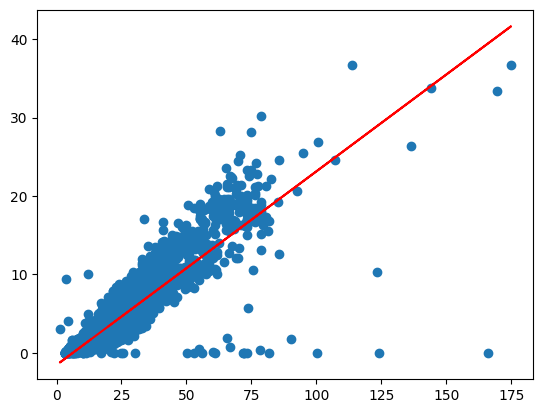

In [147]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
plt.plot(X, pred, color='r');
print(f'RMSE: {rmse(y, pred)}') # 1.6634959274132406